Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one sevenday
period , **identify which factors predict future user
adoption.**

We suggest spending 12
hours on this, but you're welcome to spend more or less.
Please send us a brief writeup of your findings (the more concise, the better no
more
than one page), along with any summary tables, graphs, code, or queries that can help
us understand your approach. Please note any factors you considered or investigation
you did, even if they did not pan out. Feel free to identify any further research or data
you think would be valuable.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import datetime
%matplotlib inline

In [2]:
eng_df = pd.read_csv('takehome_user_engagement.csv')

In [3]:
eng_df

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [4]:
user_df = pd.read_csv('takehome_users.csv')
user_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
eng_users = eng_df.groupby('user_id')['visited'].count()>=3

In [6]:
user_id = list(eng_users[eng_users==True].index)

In [7]:
pos = user_df[user_df['object_id'].isin(user_id)]

In [8]:
neg = user_df[~user_df['object_id'].isin(user_id)]

In [9]:
print neg.shape
print pos.shape

(9752, 10)
(2248, 10)


In [10]:
eng_df.time_stamp = pd.to_datetime(eng_df.time_stamp)

In [11]:
login_count = pd.DataFrame(eng_df.groupby(by='user_id').size(), columns=['login_count'])

In [12]:
user_df = user_df.join(login_count)

In [13]:
user_df.login_count.fillna(0, inplace=True)

In [14]:
user_df['invited_by_user'] = np.where(user_df.invited_by_user_id.isnull(), 0, 1)

In [15]:
user_df['guest_invite'] = np.where(user_df.creation_source == 'GUEST_INVITE', 1, 0)
user_df['org_invite'] = np.where(user_df.creation_source == 'ORG_INVITE', 1, 0)
user_df['personal_projects'] = np.where(user_df.creation_source == 'PERSONAL_PROJECTS', 1, 0)
user_df['signup_google'] = np.where(user_df.creation_source == 'SIGNUP_GOOGLE_AUTH', 1, 0)

In [16]:
user_df['adopted_user'] = pd.Series()

In [17]:
def check_logins(user_df_timestamps):
    if len(user_df_timestamps) == 3:
        if ((user_df_timestamps.iloc[1] - user_df_timestamps.iloc[0]) <= datetime.timedelta(days=7)) & \
           ((user_df_timestamps.iloc[2] - user_df_timestamps.iloc[0]) <= datetime.timedelta(days=7)):
                return 1
        else:
            return 0
    else:
        if ((user_df_timestamps.iloc[1] - user_df_timestamps.iloc[0]) <= datetime.timedelta(days=7)) & \
           ((user_df_timestamps.iloc[2] - user_df_timestamps.iloc[0]) <= datetime.timedelta(days=7)):
                return 1
        else:
            return check_logins(user_df_timestamps.iloc[1:])

for id in user_df.index:
    print("User id: ", id)
    if user_df.ix[id, 'login_count'] >= 3:
        eng_df.timestamps = eng_df.time_stamp[eng_df.user_id == id].dt.date.sort_values()
        user_df.ix[id, 'adopted_user'] = check_logins(eng_df.time_stamp)
    else:
        user_df.ix[id, 'adopted_user'] = 0

('User id: ', 0)
('User id: ', 1)
('User id: ', 2)
('User id: ', 3)
('User id: ', 4)
('User id: ', 5)
('User id: ', 6)
('User id: ', 7)
('User id: ', 8)
('User id: ', 9)
('User id: ', 10)
('User id: ', 11)
('User id: ', 12)
('User id: ', 13)
('User id: ', 14)
('User id: ', 15)
('User id: ', 16)
('User id: ', 17)
('User id: ', 18)
('User id: ', 19)
('User id: ', 20)
('User id: ', 21)
('User id: ', 22)
('User id: ', 23)
('User id: ', 24)
('User id: ', 25)
('User id: ', 26)
('User id: ', 27)
('User id: ', 28)
('User id: ', 29)
('User id: ', 30)
('User id: ', 31)
('User id: ', 32)
('User id: ', 33)
('User id: ', 34)
('User id: ', 35)
('User id: ', 36)
('User id: ', 37)
('User id: ', 38)
('User id: ', 39)
('User id: ', 40)
('User id: ', 41)
('User id: ', 42)
('User id: ', 43)
('User id: ', 44)
('User id: ', 45)
('User id: ', 46)
('User id: ', 47)
('User id: ', 48)
('User id: ', 49)
('User id: ', 50)
('User id: ', 51)
('User id: ', 52)
('User id: ', 53)
('User id: ', 54)
('User id: ', 55)
('

In [18]:
user_df.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,login_count,invited_by_user,guest_invite,org_invite,personal_projects,signup_google,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,1,1,0,0,0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,1,0,1,0,0,0.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,14.0,1,0,1,0,0,1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,1,1,0,0,0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,1,1,0,0,0,0.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,1.0,1,1,0,0,0,0.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,1.0,0,0,0,0,0,0.0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,1.0,0,0,0,1,0,0.0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,0.0,0,0,0,1,0,0.0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,0.0,1,0,1,0,0,0.0


In [19]:
user_df.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
login_count                      0
invited_by_user                  0
guest_invite                     0
org_invite                       0
personal_projects                0
signup_google                    0
adopted_user                     0
dtype: int64

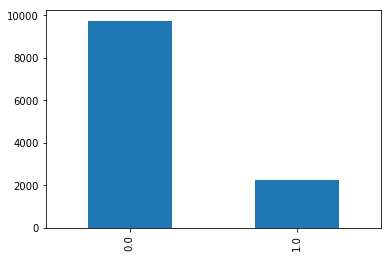

In [20]:
user_df.adopted_user.value_counts().plot(kind='bar')

In [36]:
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, confusion_matrix, f1_score

In [37]:
feature_var = ['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'login_count', \
           'guest_invite', 'org_invite', 'personal_projects', 'signup_google']
x = user_df[feature_var].values
y = user_df['adopted_user'].values

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

In [39]:
model = GridSearchCV(LogisticRegression(max_iter=1000, n_jobs=2), 
                     param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}, 
                     scoring='accuracy', cv=StratifiedKFold(n_splits=5))

In [40]:
model.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=2,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [41]:
model.cv_results_

{'mean_fit_time': array([ 0.01199999,  0.01159997,  0.01260004,  0.0138001 ,  0.01400008,
         0.01500001,  0.01760001]),
 'mean_score_time': array([ 0.0006    ,  0.00059996,  0.00040002,  0.00040002,  0.00039997,
         0.00019999,  0.00020003]),
 'mean_test_score': array([ 0.97297619,  0.95821429,  0.98214286,  0.9997619 ,  1.        ,
         1.        ,  1.        ]),
 'mean_train_score': array([ 0.9726191 ,  0.9582143 ,  0.9821726 ,  0.99961309,  1.        ,
         1.        ,  1.        ]),
 'param_C': masked_array(data = [0.0001 0.001 0.01 0.1 1 10 100],
              mask = [False False False False False False False],
        fill_value = ?),
 'params': ({'C': 0.0001},
  {'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100}),
 'rank_test_score': array([6, 7, 5, 4, 1, 1, 1]),
 'split0_test_score': array([ 0.97441999,  0.95597858,  0.98215348,  1.        ,  1.        ,
         1.        ,  1.        ]),
 'split0_train_score': array([ 0.9746986

In [42]:
model2 = LogisticRegression(C=model.best_params_['C'], max_iter=1000, n_jobs=4)
model2.fit(x_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=4,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
model2.coef_

array([[-0.42353163, -0.06078797,  4.36069475, -0.69108868, -0.87593513,
        -0.88598916, -0.85256119]])

In [44]:
model2.intercept_[0]

-10.167678818300196

In [45]:
pred = model2.predict(x_test)

In [46]:
accuracy_score(y_true=y_test, y_pred=pred)

1.0

In [47]:
confusion_matrix(y_true=y_test, y_pred=pred)

array([[2926,    0],
       [   0,  674]])

In [48]:
logit=LogisticRegression(C=1)
logit.fit(x_train,y_train)
print ('Accuracy of test data: ',(accuracy_score(logit.predict(x_test), y_test)))
print ('Accuracy of training data: ',(accuracy_score(logit.predict(x_train), y_train)))
print("\n")
print(classification_report(y_true=y_test, y_pred=pred, digits=2))

('Accuracy of test data: ', 1.0)
('Accuracy of training data: ', 1.0)


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2926
        1.0       1.00      1.00      1.00       674

avg / total       1.00      1.00      1.00      3600



In [34]:

coef = [n for n in model2.coef_[0]]
coef.append(model2.intercept_[0])

In [35]:
feature_var.append('intercept')

In [36]:
results = pd.DataFrame(columns=['feature', 'coef'])

In [37]:
results['feature'] = feature_var
results['coef'] = coef

In [38]:
results['odds'] = np.exp(results.coef)

In [39]:
results

,feature,coef,odds
0,opted_in_to_mailing_list,-0.320031,0.726127
1,enabled_for_marketing_drip,-0.028736,0.971673
2,login_count,4.393213,80.899951
3,guest_invite,-0.737687,0.478219
4,org_invite,-1.096952,0.333887
5,personal_projects,-0.862166,0.422246
6,signup_google,-0.804525,0.447300
7,intercept,-10.199792,0.000037


In [41]:
users_adopted = user_df[user_df.adopted_user == 1]

In [43]:
user_df.creation_source.value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [44]:
users_adopted.creation_source.value_counts()

ORG_INVITE            768
GUEST_INVITE          439
SIGNUP                397
PERSONAL_PROJECTS     379
SIGNUP_GOOGLE_AUTH    265
Name: creation_source, dtype: int64

In [45]:
users_adopted.opted_in_to_mailing_list.value_counts()

0    1697
1     551
Name: opted_in_to_mailing_list, dtype: int64

In [46]:
users_adopted.enabled_for_marketing_drip.value_counts()

0    1884
1     364
Name: enabled_for_marketing_drip, dtype: int64

In [47]:
import statsmodels.api as sm

In [48]:
sm_model = sm.Logit(y_test, x_test).fit()

Optimization terminated successfully.
         Current function value: 0.193816
         Iterations 12


In [49]:
print(sm_model.summary(yname='adopted_users', xname=feature_var[:-1]))

                           Logit Regression Results                           
Dep. Variable:          adopted_users   No. Observations:                 3600
Model:                          Logit   Df Residuals:                     3593
Method:                           MLE   Df Model:                            6
Date:                Thu, 13 Jul 2017   Pseudo R-squ.:                  0.5980
Time:                        08:57:10   Log-Likelihood:                -697.74
converged:                       True   LL-Null:                       -1735.8
                                        LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
opted_in_to_mailing_list      -1.8666      0.221     -8.450      0.000        -2.300    -1.434
enabled_for_marketing_drip    -0.7267      0.285     -2.548      0.011        -1.28

In [51]:
sm_pred = sm_model.predict(x_test)

In [52]:
sm_pred

array([ 0.00870433,  0.05372931,  0.54456588, ...,  0.04556718,
        0.05372931,  0.00119353])

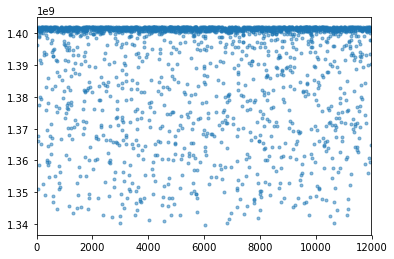

In [13]:
pos.last_session_creation_time.plot(ls='', marker='.', alpha=0.5)

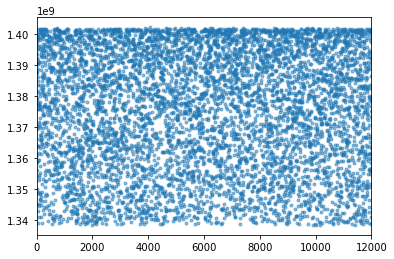

In [14]:
neg.last_session_creation_time.plot(ls='', marker='.', alpha=0.5)

In [15]:
pos.groupby('creation_source')['object_id'].count()/pos.shape[0]

creation_source
GUEST_INVITE          0.223310
ORG_INVITE            0.348310
PERSONAL_PROJECTS     0.102758
SIGNUP                0.185943
SIGNUP_GOOGLE_AUTH    0.139680
Name: object_id, dtype: float64

In [17]:
neg.groupby('creation_source')['object_id'].count()/neg.shape[0]

creation_source
GUEST_INVITE          0.170324
ORG_INVITE            0.355927
PERSONAL_PROJECTS     0.192781
SIGNUP                0.171144
SIGNUP_GOOGLE_AUTH    0.109824
Name: object_id, dtype: float64

(0, 0.035)

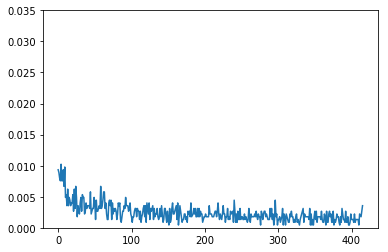

In [21]:
pyplot.plot(pos.groupby('org_id')['object_id'].count()/pos.shape[0])
pyplot.ylim([0, 0.035])

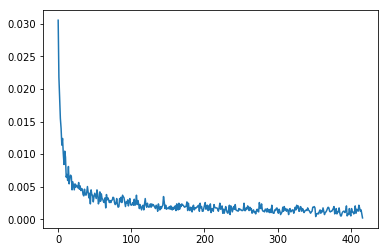

In [22]:
pyplot.plot(neg.groupby('org_id')['object_id'].count()/neg.shape[0])

## Findings

When investigating which features correspond with predicting an "adopted user", I designed a new variable to assess user engagement based on the criteria of a user visiting the prodcuct at least 3 times, and a varibiable "login_count" to associate a single user for each login.

Of the 12,000 total users, approximately 20% considered to be active adopted users. Next, I wanted get a better understanding of active users by sorting the various feautres based on what time of day they would login and which creation source they were associated with. Users did not display a positive or negative correlation.

I converted "creation_source" into a matrix of binary classifiers to evaluate if they had a strong correlation or not. Next, I ran a Logistic Regression model resulting in an extremely high accuracy score. The Logistic Regression Model determined the feature "login_count" had the highest correlation, followed by "enabled for marketing drip".

Lastly, to determine if there were any additional features that can contribute to predicting an adopted user, I plotted active vs non active users based on organization ID and was able to determine that there was feature significance.

Overall, my findings concluded that a user was enabled for marketing email drip was the most predictive feature for determining future user adoption, and this was followed by login count, and organization ID as a way of account creation.